In [216]:
import pandas as pd  # all imports should be here
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import psutil
#import orca

ModuleNotFoundError: No module named 'orca'

In [157]:
import time

In [158]:
from reportlab.pdfgen import canvas
from PyPDF2 import PdfFileWriter, PdfFileReader
from fpdf import FPDF

In [159]:
from PIL import Image
import requests
from io import BytesIO
import urllib
from urllib.request import urlopen
from PIL import Image
import urllib.request

In [160]:
data1 = pd.read_csv('https://docs.google.com/spreadsheets/d/1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc/export?format=csv&id=1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc&gid=0')
data2 = pd.read_csv('https://docs.google.com/spreadsheets/d/1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc/export?format=csv&id=1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc&gid=2076733987')
data3=pd.read_csv("https://docs.google.com/spreadsheets/d/1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc/export?format=csv&id=1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc&gid=354420944")
# reading data from google doc spreadsheet 
# link for july datasheet below 
# https://docs.google.com/spreadsheets/d/1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc/export?format=csv&id=1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc&gid=0
# link for august datasheet below
# https://docs.google.com/spreadsheets/d/1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc/export?format=csv&id=1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc&gid=2076733987

data = data3
data = pd.concat([data1, data2,data3])

In [161]:
student_name="Shakib"

In [162]:
mask=data["Student"]!="Nitish"                   # removing sir
data=data[mask]
student_names=data["Student"].unique()

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 0 to 550
Data columns (total 10 columns):
id                 1682 non-null int64
Task               1682 non-null object
Date               1682 non-null object
Module             1682 non-null object
Type               1682 non-null object
Student            1659 non-null object
Late Submission    1682 non-null int64
Points             1682 non-null float64
Total              1682 non-null int64
Task Winner        1682 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 144.5+ KB


### Cleaning data set

In [164]:
data["id"]=pd.to_numeric(data["id"])

In [165]:
data.shape

(1682, 10)

In [166]:
"""
for i in range (data.shape[0]):
    if (pd.isnull(data["Student"][i])):
        data["Student"][i]="Swaastick"
"""

#data["Student"].fillna("Anjali",inplace=True)

data["Student"].replace("Swaastik","Swaastick",inplace=True)  

In [167]:
data.reset_index(inplace=True,drop=True)  # giving index to data set
#data.drop([0],inplace=True)     # the first row contains nothing so removing it
data.dropna(inplace=True)
data=data.iloc[:,:10]           # Removing all unnessary columns after Task Winner if any

In [168]:
data.head() #cleaner data-set

,id,Task,Date,Module,Type,Student,Late Submission,Points,Total,Task Winner
0,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Chandrima,0,6.0,10,0
1,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Dipam,0,7.0,10,0
2,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Durga,0,6.0,10,0
3,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Kaushal,0,7.0,10,0
4,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Arya,0,6.0,10,0


### cleaning date

In [169]:
data["Date"]=pd.to_datetime(data["Date"])

In [170]:
data["Date_day"]=data["Date"].dt.day
data["Date_month"]=data["Date"].dt.month
data["Date_year"]=data["Date"].dt.year

In [171]:
data.drop(columns=["Date"],inplace=True)

In [172]:
#data=data[data["Date_month"]==8]

In [173]:
month_now=pd.tslib.Timestamp.now().month

### Radar PLot

In [174]:
data["Type"].value_counts()

Consistency                                                 1228
Consistency,Curiosity                                        147
Knowledge,Patience                                            74
Knowledge,Understanding,Communication,Analytical Ability      44
Intent, Creativity,Content                                    23
sincerity,Creativity,Design-sense,Writing                     22
Creativity, Intent                                            21
Creativity,Intent,sincerity                                   21
Analysis, communication, sincerity                            21
Diligence                                                     20
Sincerity,Hard-work                                           19
Creativity,Communication,Intent,Confidence                    19
Name: Type, dtype: int64

In [210]:
arr_type_name=["Consistency","Curiosity","Diligence","Creativity","Intent","sincerity","Communication","Confidence","Hard-work"]


In [176]:
type_cons_max=type_cur_max=type_dil_max=type_cre_max=type_int_max=type_sin_max=type_comm_max=type_conf_max=type_hard_max=0

for i in range(student_names.size):
    mask=data["Student"]==student_names[i]
    df=data[mask]
    df.reset_index(drop=True,inplace=True)
    type_cons=type_cur=type_dil=type_cre=type_int=type_sin=type_comm=type_conf=type_hard=0
    for i in range(df.shape[0]):
        type_cons+=df["Type"][i].count("Consistency")
        type_cur+=df["Type"][i].count("Curiosity")
        type_dil+=df["Type"][i].count("Diligence")
        type_cre+=df["Type"][i].count("Creativity")
        type_int+=df["Type"][i].count("Intent")
        type_sin+=df["Type"][i].count("sincerity")
        type_comm+=df["Type"][i].count("Communication")
        type_conf+=df["Type"][i].count("Confidence")
        type_hard+=df["Type"][i].count("Hard-work")


    #print(type_cons,type_cur,type_dil,type_cre,type_int,type_sin,type_comm,type_conf,type_hard)
    
    type_cons_max=max(type_cons_max,type_cons)
    type_cur_max=max(type_cur_max,type_cur)
    type_dil_max=max(type_dil_max,type_dil)
    type_cre_max=max(type_cre_max,type_cre)
    type_int_max=max(type_int_max,type_int)
    type_sin_max=max(type_sin_max,type_sin)
    type_comm_max=max(type_comm_max,type_comm)
    type_conf_max=max(type_conf_max,type_conf)
    type_hard_max=max(type_hard_max,type_hard)
    
print(type_cons_max,type_cur_max,type_dil_max,type_cre_max,type_int_max,type_sin_max,type_comm_max,type_conf_max,type_hard_max)
arr_type_max=[type_cons_max,type_cur_max,type_dil_max,type_cre_max,type_int_max,type_sin_max,type_comm_max,type_conf_max,type_hard_max]
arr_type_max

90 18 1 5 4 3 3 1 1


[90, 18, 1, 5, 4, 3, 3, 1, 1]

In [220]:
mask=data["Student"]==student_name
df=data[mask]
df.reset_index(drop=True,inplace=True)
type_cons=type_cur=type_dil=type_cre=type_int=type_sin=type_comm=type_conf=type_hard=0
for i in range(df.shape[0]):
    type_cons+=df["Type"][i].count("Consistency") *df["Points"][i]/df["Total"][i]
    type_cur+=df["Type"][i].count("Curiosity") *df["Points"][i]/df["Total"][i]
    type_dil+=df["Type"][i].count("Diligence") *df["Points"][i]/df["Total"][i]
    type_cre+=df["Type"][i].count("Creativity") *df["Points"][i]/df["Total"][i]
    type_int+=df["Type"][i].count("Intent") *df["Points"][i]/df["Total"][i]
    type_sin+=df["Type"][i].count("sincerity") *df["Points"][i]/df["Total"][i]
    type_comm+=df["Type"][i].count("Communication") *df["Points"][i]/df["Total"][i]
    type_conf+=df["Type"][i].count("Confidence") *df["Points"][i]/df["Total"][i]
    type_hard+=df["Type"][i].count("Hard-work") *df["Points"][i]/df["Total"][i]
    

print(type_cons,type_cur,type_dil,type_cre,type_int,type_sin,type_comm,type_conf,type_hard)
arr_type=[type_cons,type_cur,type_dil,type_cre,type_int,type_sin,type_comm,type_conf,type_hard]
arr_type
#df


80.0 10.0 1.0 4.191666666666666 3.425 2.566666666666667 2.375 0.875 0.95


[80.0,
 10.0,
 1.0,
 4.191666666666666,
 3.425,
 2.566666666666667,
 2.375,
 0.875,
 0.95]

In [178]:
arr_type_percentage=[]
for i in range(len(arr_type_max)):
    arr_type_percentage.append(arr_type[i]/arr_type_max[i]*10)

In [179]:
len(arr_type_percentage)

9

In [224]:
import plotly.express as px


df = pd.DataFrame(dict(
    r=arr_type_percentage,
    theta=arr_type_name))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()
#df

fig.write_image("radar_plot.png")

### Analysis Starts here

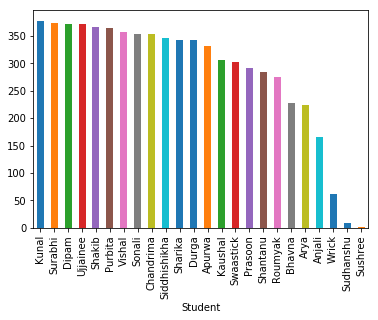

In [196]:
data_topper = data.groupby("Student")["Points"].sum().sort_values(ascending=False)
data_topper.plot("bar")
data_topper

plt.savefig('marks_bar_plot.png')

In [182]:
#mask=data["Task"]=="AjKyaUkhada"
#df=data[mask]
mask=data["Student"]==student_name
df=data[mask]

df.reset_index(drop=True,inplace=True)

Points_cum=[]
sum_cum=0
for i in df["Points"]:
    sum_cum=sum_cum + i
    Points_cum.append(sum_cum)

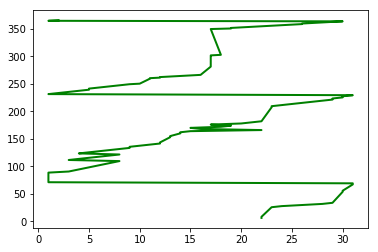

In [183]:
#plt.plot(df["Date_day"],Points_cum)
plt.plot(df["Date_day"],Points_cum, color='green', linewidth = 2) 

## Traditionala mmarksheet

In [184]:
mask=data["id"]!=0
df=data[mask]
mask=df["Student"]==student_name
df_student=df[mask]

In [185]:
topper_points=df.groupby("id")["Points"].max()
total_points=df.groupby("id")["Total"].max()
student_points=df_student.groupby("id")["Points"].max()

student_percentage=student_points/total_points *100
topper_percentage=topper_points/total_points *100


In [186]:
topper_percentage

id
1      90.0
2      84.0
3      88.0
4      90.0
5     100.0
6      95.0
7     100.0
8      95.0
9      95.0
10    100.0
11    100.0
12    100.0
13    100.0
14    100.0
dtype: float64

In [187]:
student_percentage

id
1      60.000000
2      70.000000
3      80.000000
4      76.666667
5      87.500000
6      95.000000
7     100.000000
8      95.000000
9      85.000000
10    100.000000
11     94.000000
12     90.000000
13    100.000000
14     97.500000
dtype: float64

In [188]:
#data

# PDf

In [189]:
months=["","January","Febuary","March","April","May","June","July", "August", "September", "October","November","December"]
months[month_now]

'October'

In [190]:
url_background="https://www.mcahamilton.org/image/image.freepik.com/free-vector/abstract-bright-background-with-a-modern-design_1048-2938.jpg"
url_campusx_logo="https://www.purewater.bg/wp-content/uploads/2018/07/campusx_logo_horizontal.png"
url_grade_aa="https://media.istockphoto.com/vectors/illustration-of-a-circled-red-a-grade-vector-id1128237468?k=6&m=1128237468&s=612x612&w=0&h=Kx6D94iMNao9iiLLo97k4TfVirMuhL2FAnKlZfBfDaA="

In [191]:
class AppURLopener(urllib.request.FancyURLopener):
    version = "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.69 Safari/537.36"
urllib._urlopener = AppURLopener()

urllib._urlopener.retrieve(url_background, "background_img.jpg")
urllib._urlopener.retrieve(url_campusx_logo, "campusx_logo_img.png")
urllib._urlopener.retrieve(url_grade_aa, "grade_aa_img.jpg")

('grade_aa_img.jpg', <http.client.HTTPMessage at 0x212967460f0>)

In [192]:
#urllib.request.urlretrieve(url_background, "background_img.jpg")

In [228]:
pdf = FPDF()
pdf.add_page()
pdf.image("campusx_logo_img.png", x=75, y=0, w=60)

pdf.set_font("times", size=30)
pdf.cell(400, 60, txt="Performance Report for "+months[month_now], ln=1, align="L")

pdf.image("grade_aa_img.jpg", x=160, y=18, w=38)

pdf.image("marks_bar_plot.png", x=0, y=50, w=110)

pdf.image("radar_plot.png", x=0, y=130, w=110)

pdf.output("report_card_demo.pdf")

''

In [194]:
from fpdf import FPDF
 
pdf = FPDF()
pdf.add_page()
#pdf.set_font("times", size=40)
#pdf.cell(400, 20, txt="Performance Analysis 2 ", ln=1, align="L")
pdf.image("campusx_logo_img.png",w=50)
pdf.output("pdf_watermark.pdf")

''

In [195]:
# Watermark
def create_watermark(input_pdf, output, watermark):
    watermark_obj = PdfFileReader(watermark)
    watermark_page = watermark_obj.getPage(0)

    pdf_reader = PdfFileReader(input_pdf)
    pdf_writer = PdfFileWriter()
    
create_watermark(
        input_pdf='report_card_demo.pdf', 
        output='watermarked_notebook.pdf',
        watermark='pdf_watermark.pdf')